<a href="https://colab.research.google.com/github/morenaherrera2/AA2-HerreraM-NardiG-ZorzoloJ/blob/main/Problema_1_TP1_AA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1 AAII 2025 - Redes Densas y Convolucionales

**PROBLEMA 1 -GRUPO N° 5**

Autores:
- Herrera Morena (H-1187/8)
- Nardi Gianella Belén (N-1277/7)
- Zorzolo Rubio Juana (Z-1217/3)

# Problema 1

**Descripción:**
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento
académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El
objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de
rendimiento académico de los estudiantes basado en las características proporcionadas.

● Hours Studied: número total de horas dedicadas al estudio por cada estudiante.

● Previous Scores: puntuaciones obtenidas por los estudiantes en exámenes previos.

● Extracurricular Activities: si el estudiante participa en actividades extracurriculares (Sí o
No).

● Sleep Hours: número promedio de horas de sueño que el estudiante tuvo por día.

● Sample Question Papers Practiced: número de cuestionarios de muestra que el estudiante
practicó.

Además, el dataset incluye la variable objetivo:

● Performance Index: índice que representa el rendimiento académico general de cada
estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores
más altos indican un mejor rendimiento.

## Instalaciones e importaciones

In [ ]:
!pip install -q gdown

In [ ]:
import gdown
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# TP1-1-student_performance.zip
gdown.download('https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc')

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /content/TP1-1-student_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 52.9MB/s]


'TP1-1-student_performance.zip'

In [ ]:
with zipfile.ZipFile('TP1-1-student_performance.zip', 'r') as zip_ref:
  zip_ref.extractall('./TP1-1')

In [ ]:
data = pd.read_csv('/content/TP1-1/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Análisis y preprocesamiento de datos (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


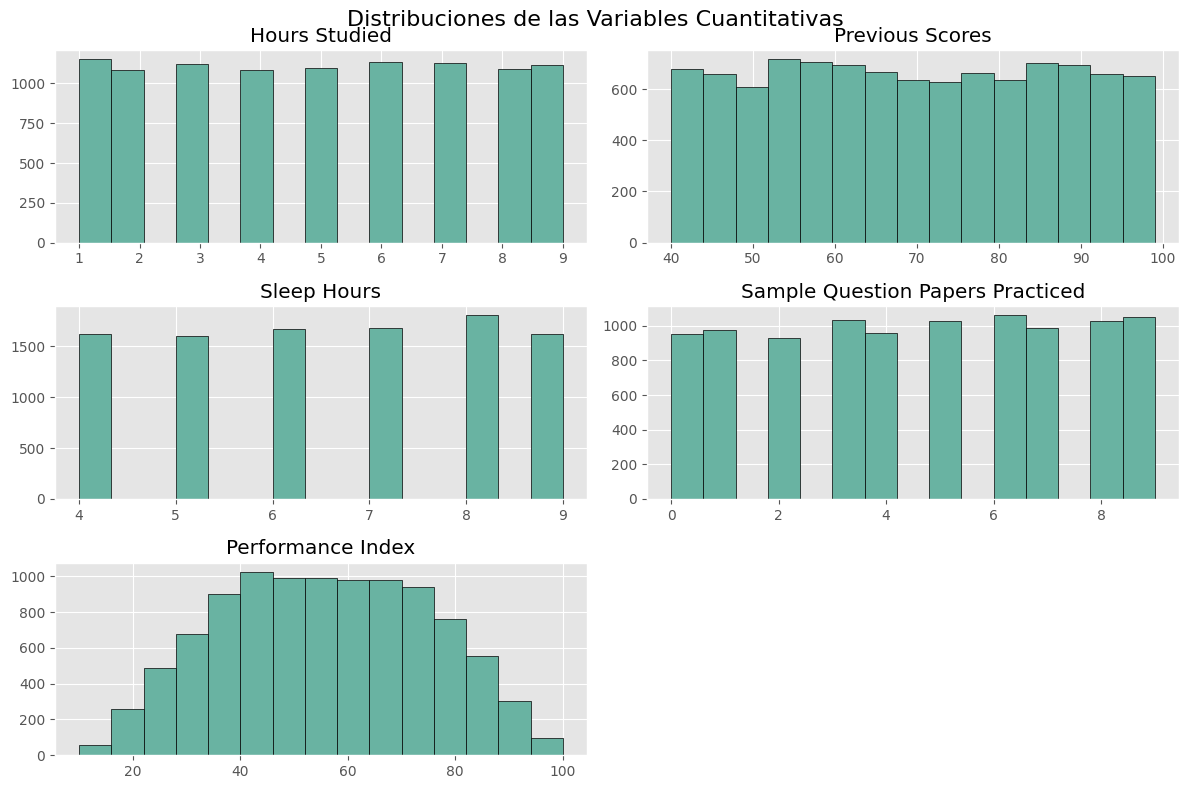

In [ ]:
# Histogramas de las variables
cuantitative = data.select_dtypes(include=['int64', 'float64'])
plt.style.use('ggplot')
cuantitative.hist(figsize=(12, 8), bins=15, edgecolor='black', color='#69b3a2')
plt.suptitle("Distribuciones de las Variables Cuantitativas", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Conclusión: Las distribuciones son mayormente uniformes; la distribución de 'Performance Index' es la que más se asemeja a una normal. 'Extracurricular Activities' es una variable categórica.

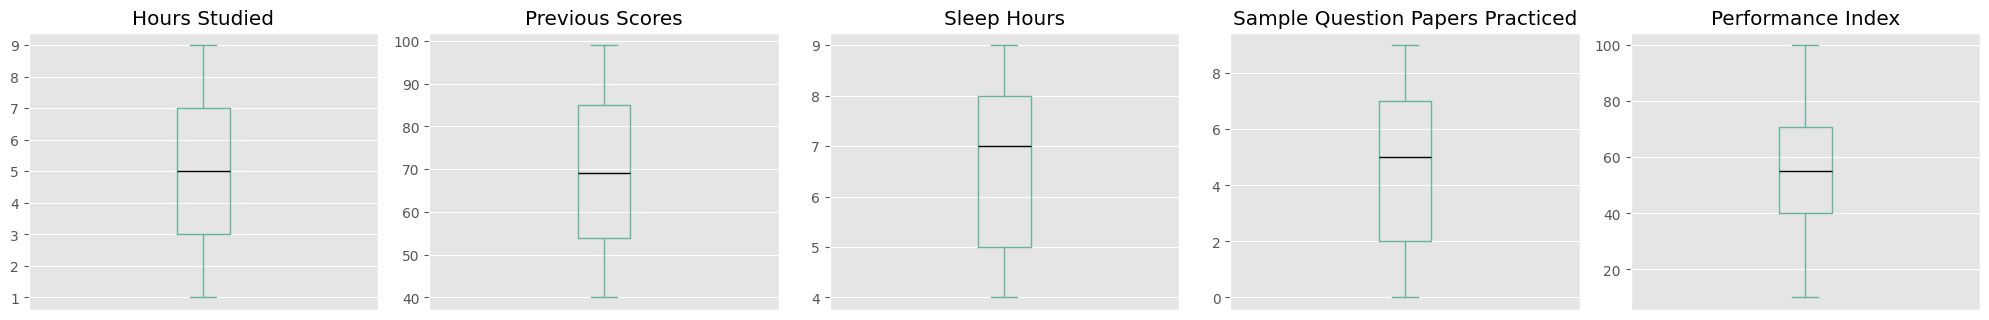

In [ ]:
# Boxplots de las variables
data_boxplot = data.drop(columns=['Extracurricular Activities'])

plt.figure(figsize=(20, 15))
for i, box in enumerate(data_boxplot.columns):
  plt.subplot(5, 5, i+1)
  data_boxplot.boxplot(
    column=box,
    boxprops=dict(color='#69b3a2'),
    whiskerprops=dict(color='#69b3a2'),
    capprops=dict(color='#69b3a2'),
    medianprops=dict(color='black'),
    flierprops=dict(markerfacecolor='#69b3a2', marker='o', markersize=5, linestyle='none', alpha=0.5)
  )
  plt.title(box)
  plt.xticks([])
plt.tight_layout()
plt.show()

Conclusión: Podemos observar que las variables no tienen valores atípicos.


La distribución simétrica de los valores y la ausencia de ruido sugiere que el dataset podría haber sido generado artificialmente.

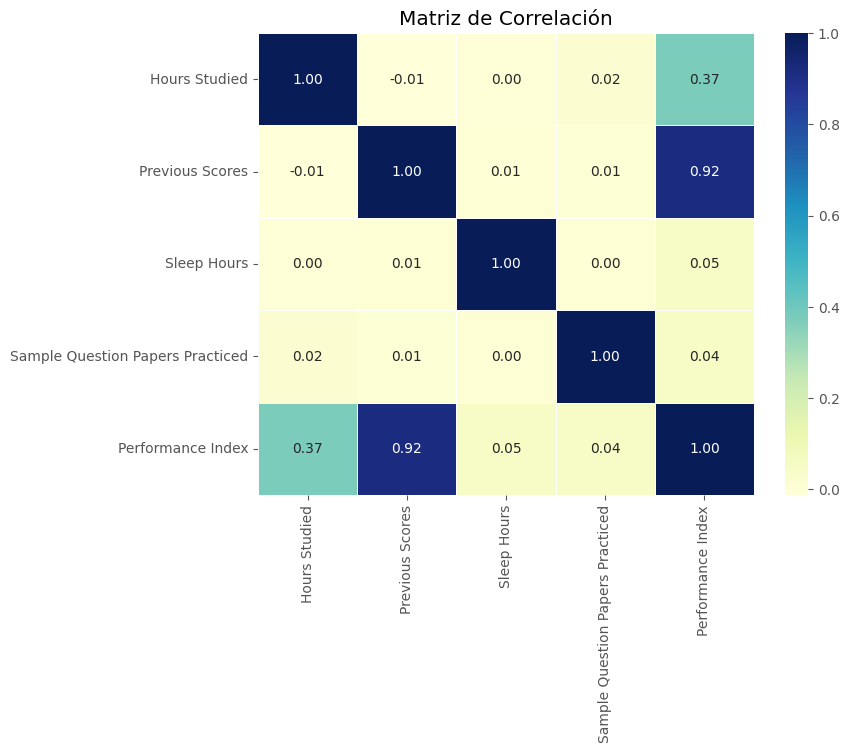

In [ ]:
# Matriz de correlación
variables_numericas = data.drop(columns=['Extracurricular Activities'])
correlation_matrix = variables_numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='white')
plt.title('Matriz de Correlación')
plt.show()

Conclusión:

Hay una fuerte correlación positiva del 0.92 entre las variables 'Performance Index' y 'Previous Scores', indicando que a medida que una variable aumenta/disminuye, la otra también tiende a hacerlo.

Además, una correlación positiva del 0.37 entre 'Performance Index' y 'Hours Studied', indicando que a mayor/menor cantidad de horas estudiadas, el índice de rendimiento tiende a aumentar/disminuir levemente.

'Previous Scores' y 'Hours Studied' son las variables más significativas para la variable objetivo ('Performance Index'), es decir, las que mas aportarán al entrenamiento del modelo.



## Codificación de variables categóricas

Codificamos la variable 'Extracurricular Activities', para el entrenamiento del modelo.

In [ ]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'No': 0, 'Yes': 1})
print(data['Extracurricular Activities'].value_counts())

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


## División de los datos en train-test

In [ ]:
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalado de variables para el modelo

Escalamos las variables utilizando 'MinMaxScaler' para normalizar los valores entre 0 y 1, ya que las distribuciones no presentan sesgos ni outliers. Esto para que todas las variables influyan por igual a la hora del entrenamiento del modelo.

Decidimos no escalar 'extracurricular activities' ya que es una variable binaria (0 o 1), ya está normalizada y escalarla no tiene sentido.

In [ ]:
# Guardamos la variable 'Extracurricular Activities' para volver a agregarla después del escalado
extra_train = X_train['Extracurricular Activities'].reset_index(drop=True)
extra_test = X_test['Extracurricular Activities'].reset_index(drop=True)

In [ ]:
# Eliminamos la variable 'Extracurricular Activities' antes del escalado
X_train_no_bin = X_train.drop(columns='Extracurricular Activities')
X_test_no_bin = X_test.drop(columns='Extracurricular Activities')

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_no_bin)
X_test_scaled = scaler.transform(X_test_no_bin)

Visualizamos el escalado en los datos.

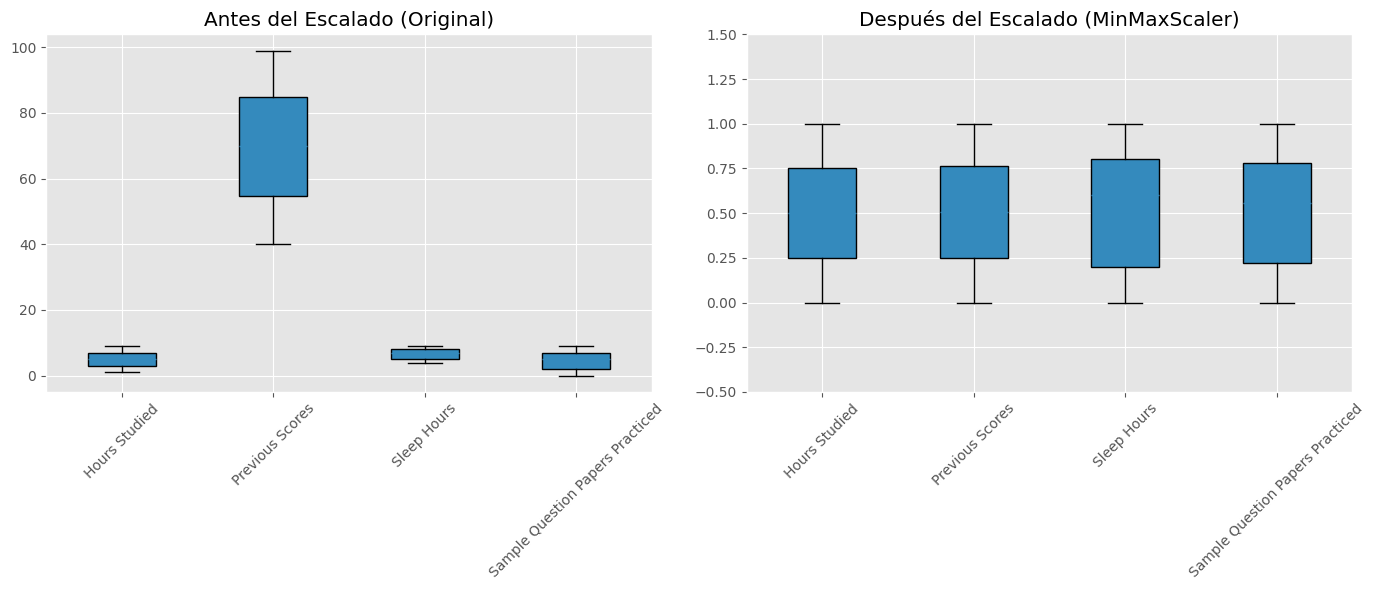

In [ ]:
# Creamos DataFrames para los datos originales y escalados
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_no_bin.columns)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot antes del escalado
axes[0].boxplot(X_train_no_bin.values, vert=True, patch_artist=True)
axes[0].set_title('Antes del Escalado (Original)')
axes[0].set_xticks(range(1, len(X_train_no_bin.columns) + 1))
axes[0].set_xticklabels(X_train_no_bin.columns, rotation=45)

# Boxplot después del escalado
axes[1].boxplot(X_train_scaled_df.values, vert=True, patch_artist=True)
axes[1].set_title('Después del Escalado (MinMaxScaler)')
axes[1].set_xticks(range(1, len(X_train_no_bin.columns) + 1))
axes[1].set_xticklabels(X_train_no_bin.columns, rotation=45)
axes[1].set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

In [ ]:
# Volvemos a agregar la columna 'Extracurricular Activities'
X_train_scaled = np.hstack((X_train_scaled, extra_train.values.reshape(-1, 1)))
X_test_scaled = np.hstack((X_test_scaled, extra_test.values.reshape(-1, 1)))

## Definición y entrenamiento del modelo

Definimos una red neuronal con una capa oculta de 2 neuronas y activación 'ReLu'.

Compilamos el modelo con el optimizador Adam (eficiente para problemas de regresión) con un 'learning_rate' de 0,001 y como función de pérdida el Error Cuadrático Medio 'MSE' (penaliza fuertemente los errores grandes).

In [ ]:
# Definimos del modelo
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compilamos del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Entrenamos
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3379.8181 - val_loss: 3086.0422
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2987.0547 - val_loss: 2589.4294
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2442.8333 - val_loss: 1988.5792
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1828.6564 - val_loss: 1396.8616
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1258.3596 - val_loss: 904.5767
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 795.2832 - val_loss: 558.5402
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 490.6874 - val_loss: 356.3698
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 327.5325 - val_loss: 261.1653
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 241.5655 - val_loss: 221.2635
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 219.6583 - val_loss: 202.3648
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 199.7970 - val_los

## Evaluación del modelo

In [ ]:
# Evaluamos en test
y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (test): {mse:.2f}")
print(f"MAE (test): {mae:.2f}")
print(f"R² (test): {r2:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE (test): 4.08
MAE (test): 1.61
R² (test): 0.99


In [ ]:
# Evaluamos en train
y_train_pred = model.predict(X_train_scaled).flatten()

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"MSE (train): {mse_train:.2f}")
print(f"MAE (train): {mae_train:.2f}")
print(f"R² (train): {r2_train:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE (train): 4.18
MAE (train): 1.62
R² (train): 0.99


Conclusión: Los valores 'MSE' y 'MAE' dieron similares para el conjunto de entrenamiento y de prueba, lo que nos indica que el modelo generaliza adecuadamente para datos no vistos.

El 'R cuadrado' nos dió un valor que indica un ajuste lineal casi perfecto.


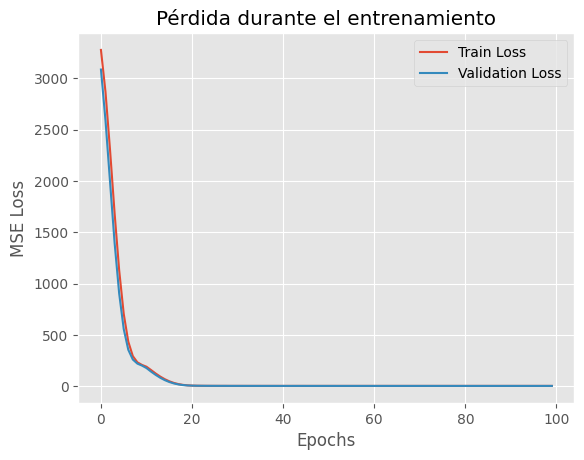

In [ ]:
# Visualizamos el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Conclusión: Observamos un entrenamiento estable y sin sobreajuste.

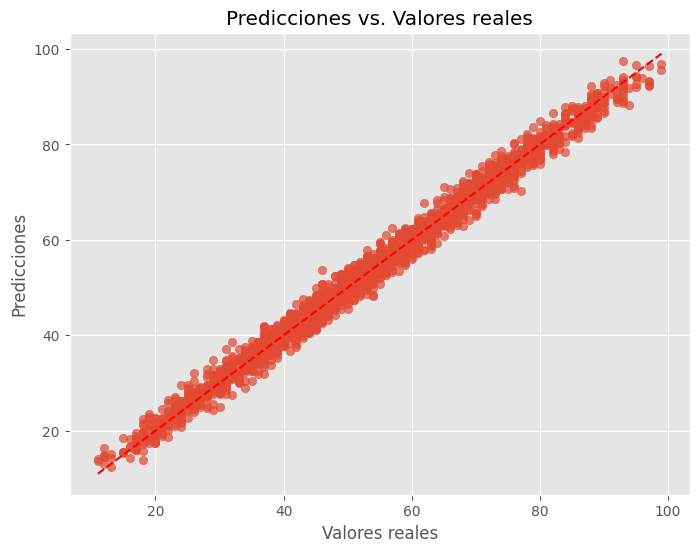

In [ ]:
# Visualizamos los resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

## **Conclusión Final:**

En este Problema desarrollamos un modelo de Red Neuronal para predecir el 'Performance Index' (rendimiento académico) de estudiantes universitarios en base a distintos factores. Llevamos a cabo un Análisis Exploratorio de Datos (EDA), incluyendo la normalización de las variables predictoras, y entrenamos un modelo de regresión utilizando Redes Neuronales.

La evaluación del desempeño nos mostró buenos resultados tanto en el conjunto de entrenamiento como en el de prueba, con métricas de error relativamente bajas. Además, los gráficos de pérdida durante el entrenamiento y la comparación entre valores reales y predichos respaldan la eficacia del modelo.

Logramos construir un sistema de predicción capaz de ajustar de forma precisa el índice de rendimiento de los estudiantes.



# Alternativa problema 1
Modelo entrenado con las variables que tienen una correlación fuerte con la variable objetivo.

## Generación del data_alt

In [ ]:
data_alt = data[['Hours Studied', 'Previous Scores', 'Performance Index']]
data_alt.head()

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


## División en train-test

In [ ]:
X = data_alt.drop('Performance Index', axis=1)
y = data_alt['Performance Index']

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalado de variables para el modelo

In [ ]:
scaler = MinMaxScaler()
X_train_scaled_alt = scaler.fit_transform(X_train_alt)
X_test_scaled_alt = scaler.transform(X_test_alt)

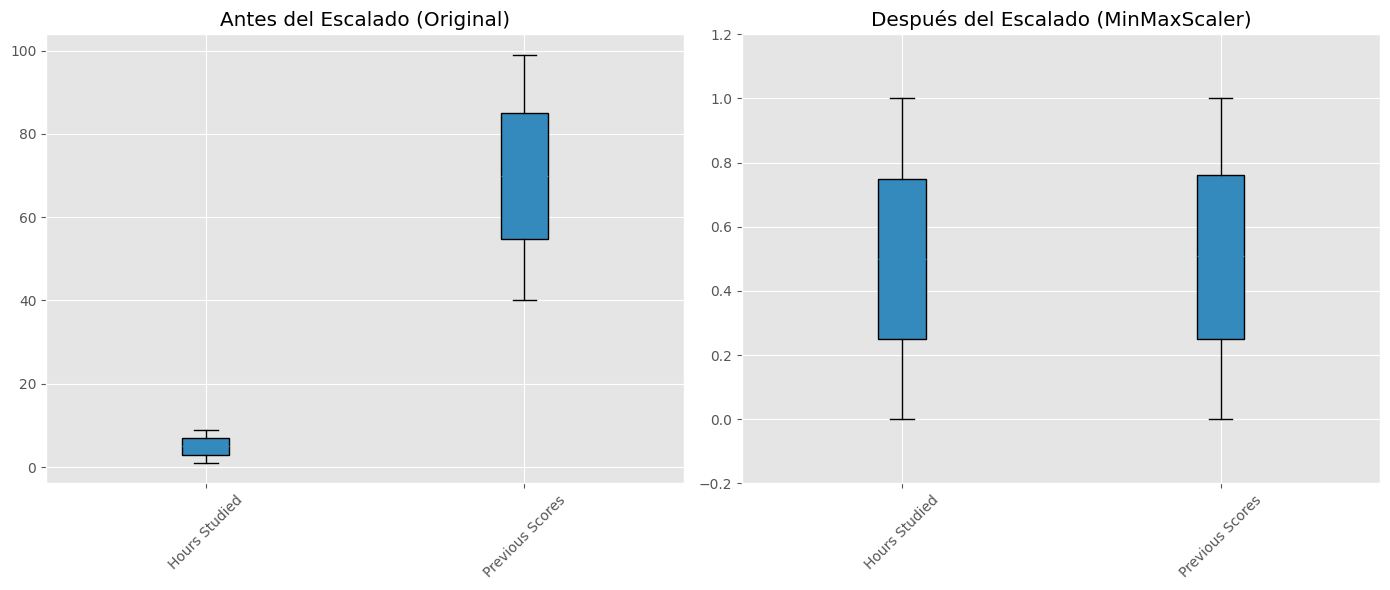

In [ ]:
# Creamos DataFrames para los datos originales y escalados
X_train_scaled_df_alt = pd.DataFrame(X_train_scaled_alt, columns=X_train_alt.columns)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot antes del escalado
axes[0].boxplot(X_train_alt.values, vert=True, patch_artist=True)
axes[0].set_title('Antes del Escalado (Original)')
axes[0].set_xticks(range(1, len(X_train_alt.columns) + 1))
axes[0].set_xticklabels(X_train_alt.columns, rotation=45)

# Boxplot después del escalado
axes[1].boxplot(X_train_scaled_df_alt.values, vert=True, patch_artist=True)
axes[1].set_title('Después del Escalado (MinMaxScaler)')
axes[1].set_xticks(range(1, len(X_train_alt.columns) + 1))
axes[1].set_ylim(-0.2, 1.2)
axes[1].set_xticklabels(X_train_alt.columns, rotation=45)

plt.tight_layout()
plt.show()

## Definición y entrenamiento del modelo

In [ ]:
# Definimos el modelo
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train_scaled_alt.shape[1],)),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1)  # salida continua (regresión)
])

# Compilamos el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Entrenamos
history = model.fit(X_train_scaled_alt, y_train_alt, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3418.0256 - val_loss: 3190.0701
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3073.8689 - val_loss: 2820.0759
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2737.7561 - val_loss: 2374.3103
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2312.4631 - val_loss: 1899.4447
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1801.8296 - val_loss: 1436.2429
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1341.7319 - val_loss: 1023.4857
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 935.4756 - val_loss: 683.0939
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 606.9630 - val_loss: 429.7743
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 375.8420 - val_loss: 260.5071
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 225.8534 - val_loss: 162.9017
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 145.5220 - val_

## Evaluación del modelo

In [ ]:
# Evaluamos en test
y_pred_alt = model.predict(X_test_scaled_alt).flatten()

mse_alt = mean_squared_error(y_test_alt, y_pred_alt)
mae_alt = mean_absolute_error(y_test_alt, y_pred_alt)
r2_alt = r2_score(y_test_alt, y_pred_alt)

print(f"MSE (test) modelo alternativo: {mse_alt:.2f}")
print(f"MAE (test) modelo alternativo: {mae_alt:.2f}")
print(f"R² (test) modelo alternativo: {r2_alt:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE (test) modelo alternativo: 5.27
MAE (test) modelo alternativo: 1.83
R² (test) modelo alternativo: 0.99


In [ ]:
# Evaluamos en train
y_train_pred_alt = model.predict(X_train_scaled_alt).flatten()

mse_train_alt = mean_squared_error(y_train_alt, y_train_pred_alt)
mae_train_alt = mean_absolute_error(y_train_alt, y_train_pred_alt)
r2_train_alt = r2_score(y_train_alt, y_train_pred_alt)

print(f"MSE (train) modelo alternativo: {mse_train_alt:.2f}")
print(f"MAE (train) modelo alternativo: {mae_train_alt:.2f}")
print(f"R² (train) modelo alternativo: {r2_train_alt:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE (train) modelo alternativo: 5.22
MAE (train) modelo alternativo: 1.82
R² (train) modelo alternativo: 0.99


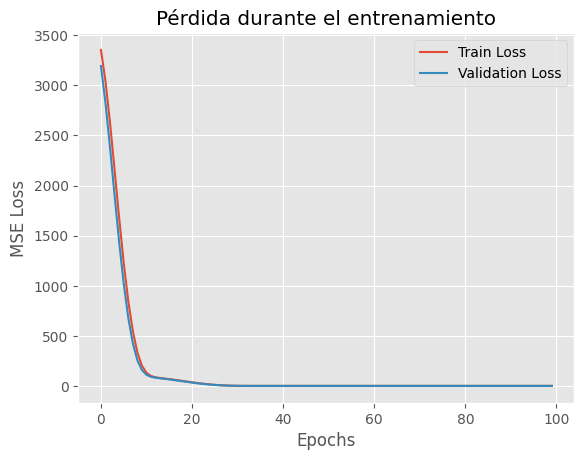

In [ ]:
# Visualizamos el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

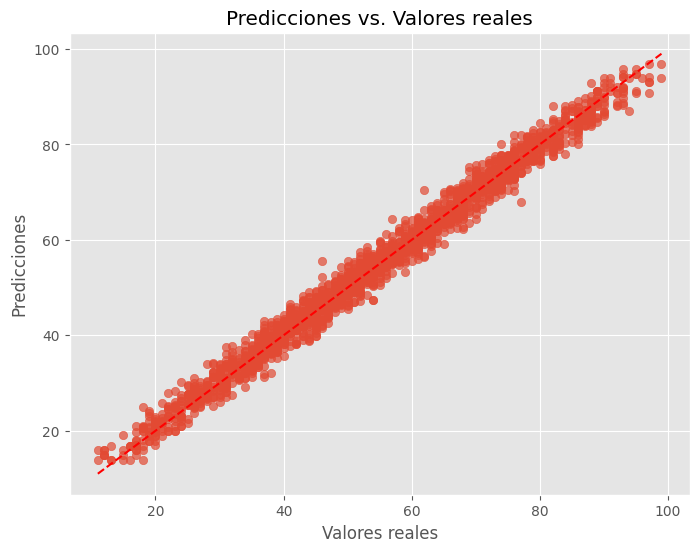

In [ ]:
# Visualizamos resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test_alt, y_pred_alt, alpha=0.7)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.plot([y_test_alt.min(), y_test_alt.max()], [y_test_alt.min(), y_test_alt.max()], 'r--')
plt.grid(True)
plt.show()

## **Conclusión Final:**

En comparación con el modelo anterior, aunque las métricas MSE y MAE aumentaron levemente, el valor de R cuadrado se mantuvo constante, lo que nos indica que el desempeño del modelo no se vio significativamente afectado. Dado que este nuevo modelo utiliza menos variables y ofrece un rendimiento similar, nos resulta preferible por su simplicidad.
